Keval Shah
<br>
60009220061
<br>
IPCV Exp 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
image = train_images[np.random.randint(0, train_images.shape[0])]

In [ ]:
def freq_calc(image):
  pixel_freq = np.zeros(256)
  for row in range(image.shape[0]):
    for col in range(image.shape[1]):
      pixel_val = image[row][col]
      pixel_freq += 1
  return pixel_freq

In [ ]:
freq_calc(image)

array([784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 784., 784., 784., 784.,
       784., 784., 784., 784., 784., 784., 784., 78

In [ ]:
len(freq_calc(image))

256

In [ ]:
h, bin_edges = np.histogram(image.flatten(), bins=256, range=[0, 256])
pmf = h/np.sum(h)
cdf = pmf.cumsum()
new_gray_values = (cdf*255).astype('uint8')
img_equalized = new_gray_values[image]

In [ ]:
m=freq_calc(image)

In [ ]:
pixel_freq = freq_calc(image)
pixel_pdf = pixel_freq / np.sum(pixel_freq)
pixel_cumsum = np.cumsum(pixel_pdf)
bits_cumsum = 255 * pixel_cumsum
pixel_map = np.floor(bits_cumsum).astype(int)
img_equalized = np.zeros_like(image)

In [ ]:
pixel_pdf = m[0]/np.sum(m)
pixel_cumsum = np.cumsum(pixel_pdf)
bits_cumsum = 255*pixel_cumsum
pixel_map = np.fix(bits_cumsum).astype(int)

In [ ]:
for row in range(image.shape[0]):
    for col in range(image.shape[1]):
        pixel_val = image[row][col]
        img_equalized[row][col] = pixel_map[pixel_val]

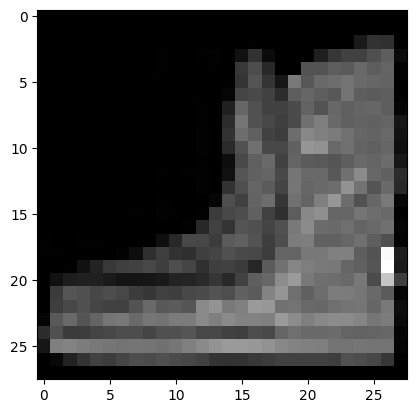

In [ ]:
plt.imshow(img_equalized,cmap='gray')

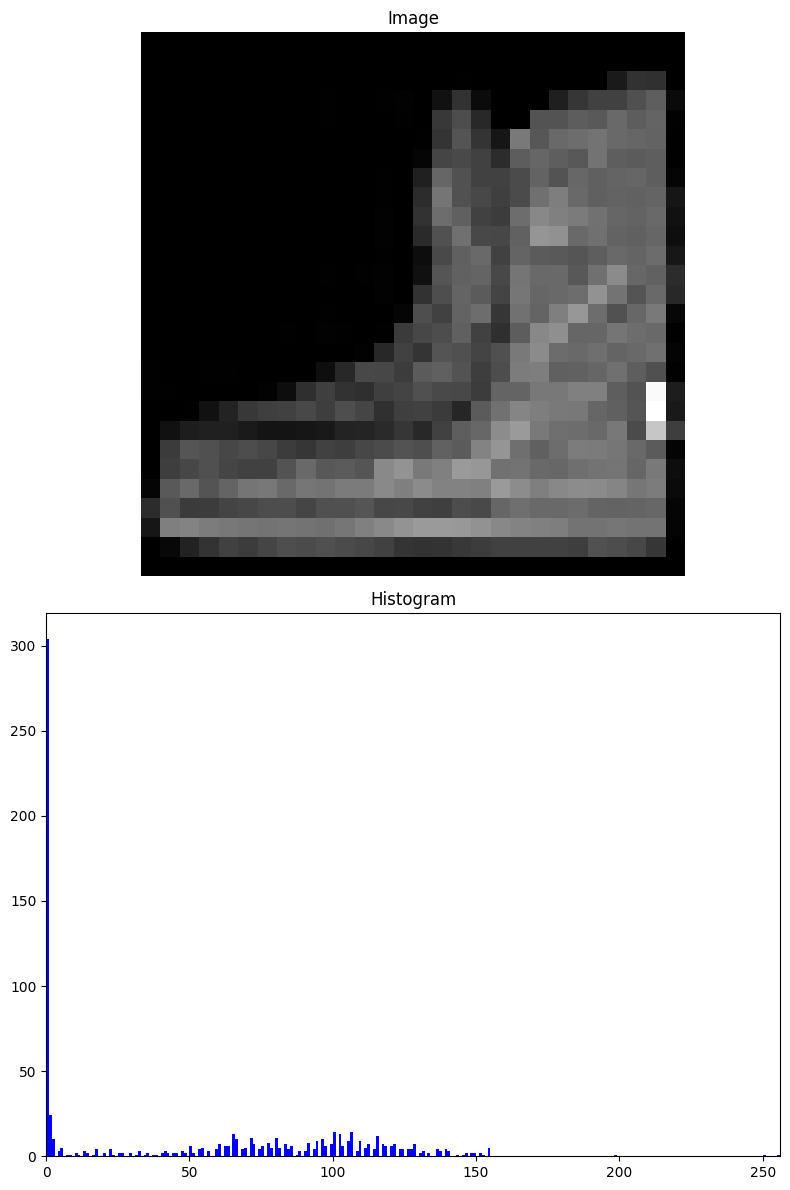

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Image')
axs[0].axis('off')

axs[1].hist(image.flatten(), bins=256, range=[0, 256], color='blue')
axs[1].set_title('Histogram')
axs[1].set_xlim([0, 256])
plt.tight_layout()

plt.show()

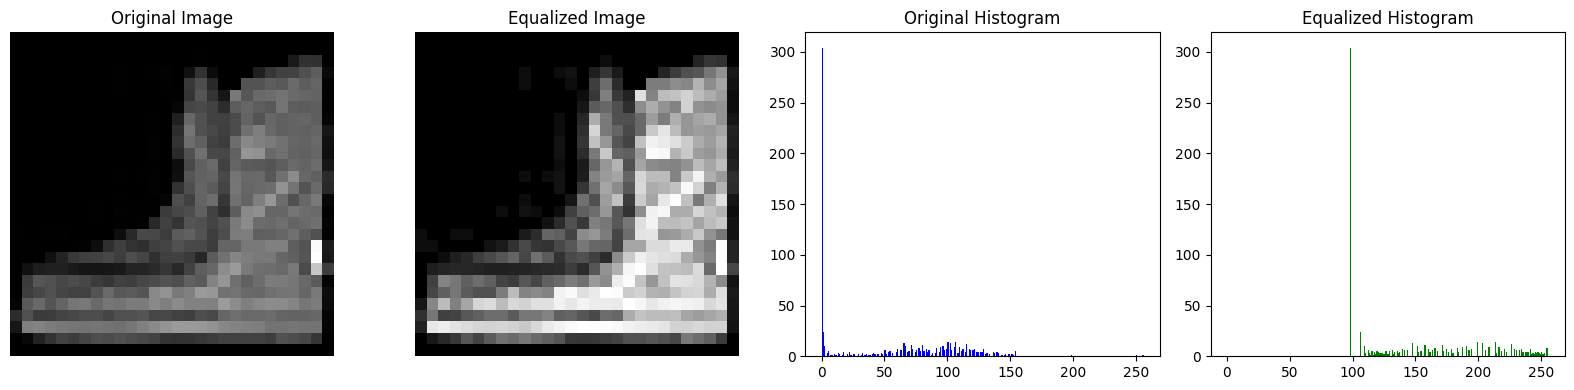

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(img_equalized, cmap='gray')
axs[1].set_title('Equalized Image')
axs[1].axis('off')

axs[2].hist(image.flatten(), bins=256, range=[0, 256], color='blue')
axs[2].set_title('Original Histogram')

axs[3].hist(img_equalized.flatten(), bins=256, range=[0, 256], color='green')
axs[3].set_title('Equalized Histogram')

plt.tight_layout()

plt.show()

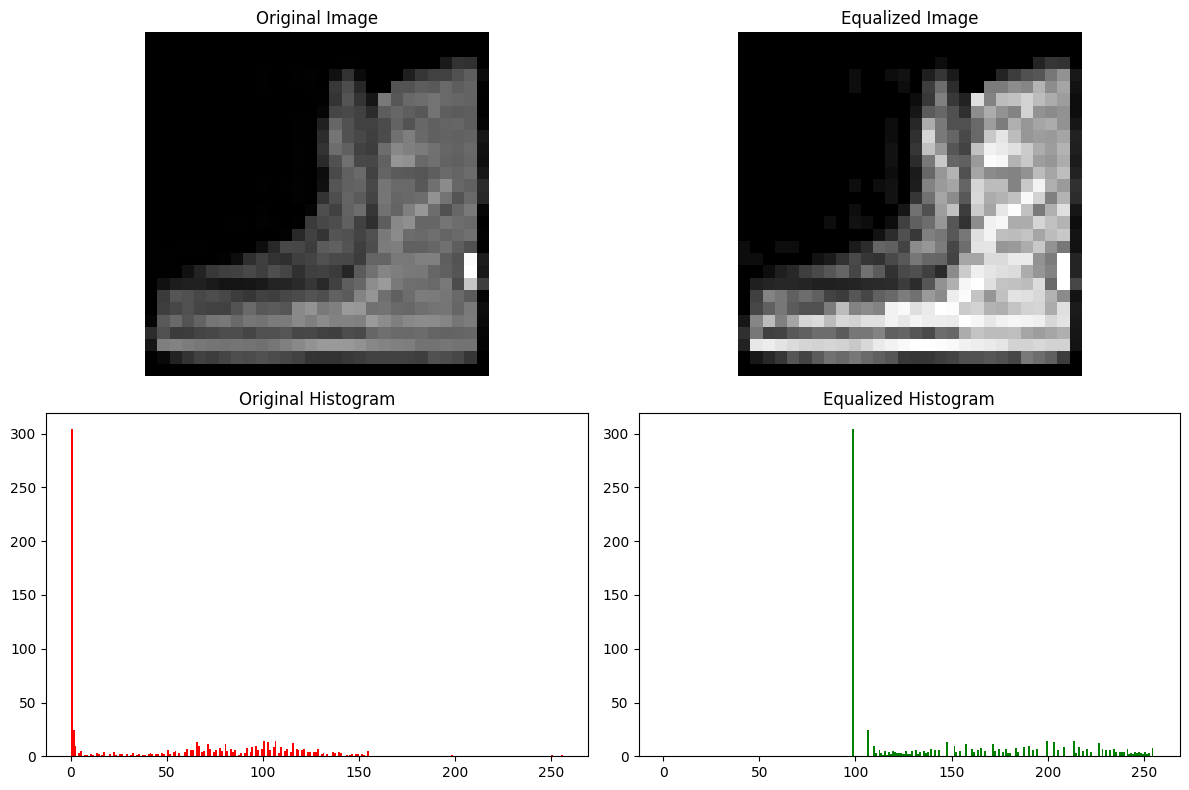

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')
axs[0, 1].imshow(img_equalized, cmap='gray')
axs[0, 1].set_title('Equalized Image')
axs[0, 1].axis('off')
axs[1, 0].hist(image.flatten(), bins=256, range=[0, 256], color='red')
axs[1, 0].set_title('Original Histogram')
axs[1, 1].hist(img_equalized.flatten(), bins=256, range=[0, 256], color='green')
axs[1, 1].set_title('Equalized Histogram')

plt.tight_layout()
plt.show()

In [ ]:
mini = np.min(image)
maxi = np.max(image)

img_str = ((image-mini)/(maxi-mini))*255
img_str = img_str.astype('uint8')

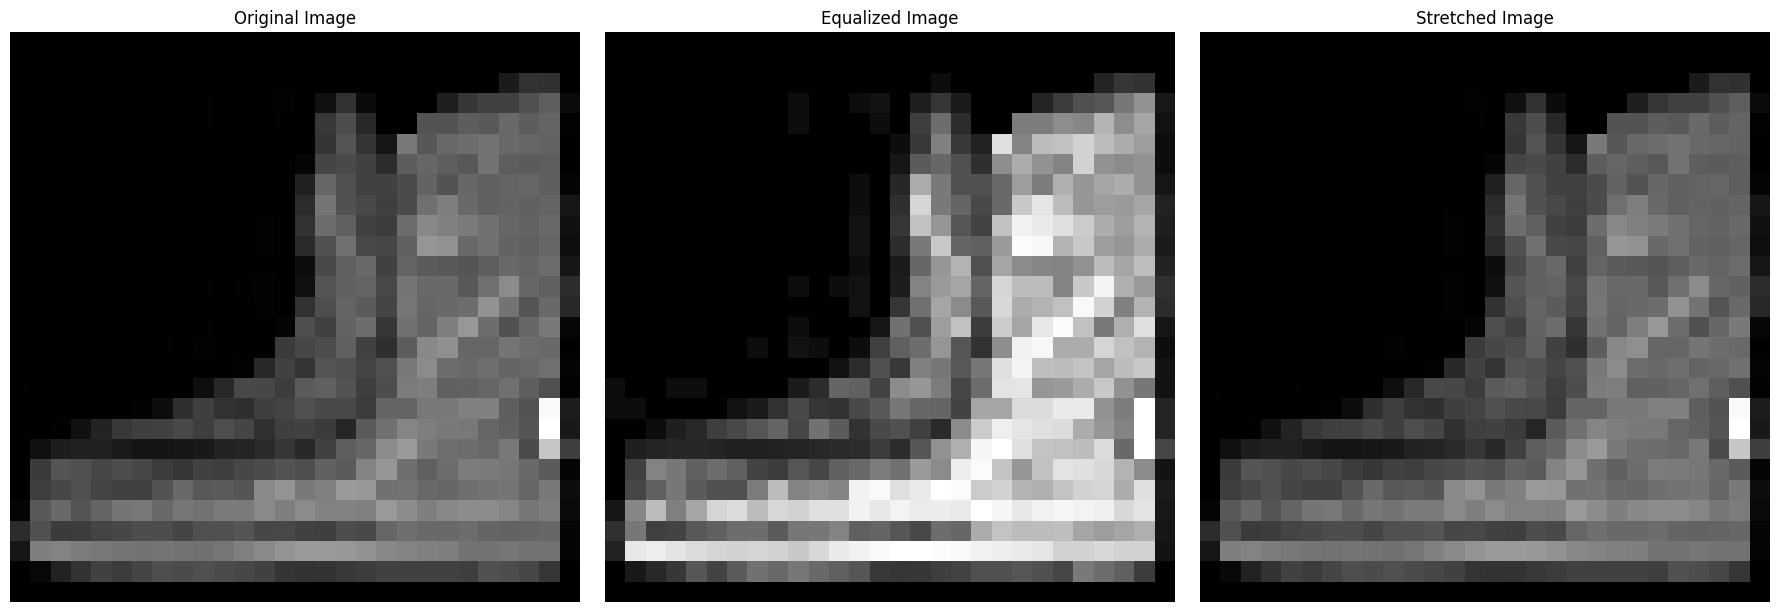

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(img_equalized, cmap='gray')
axs[1].set_title('Equalized Image')
axs[1].axis('off')
axs[2].imshow(img_str, cmap='gray')
axs[2].set_title('Stretched Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

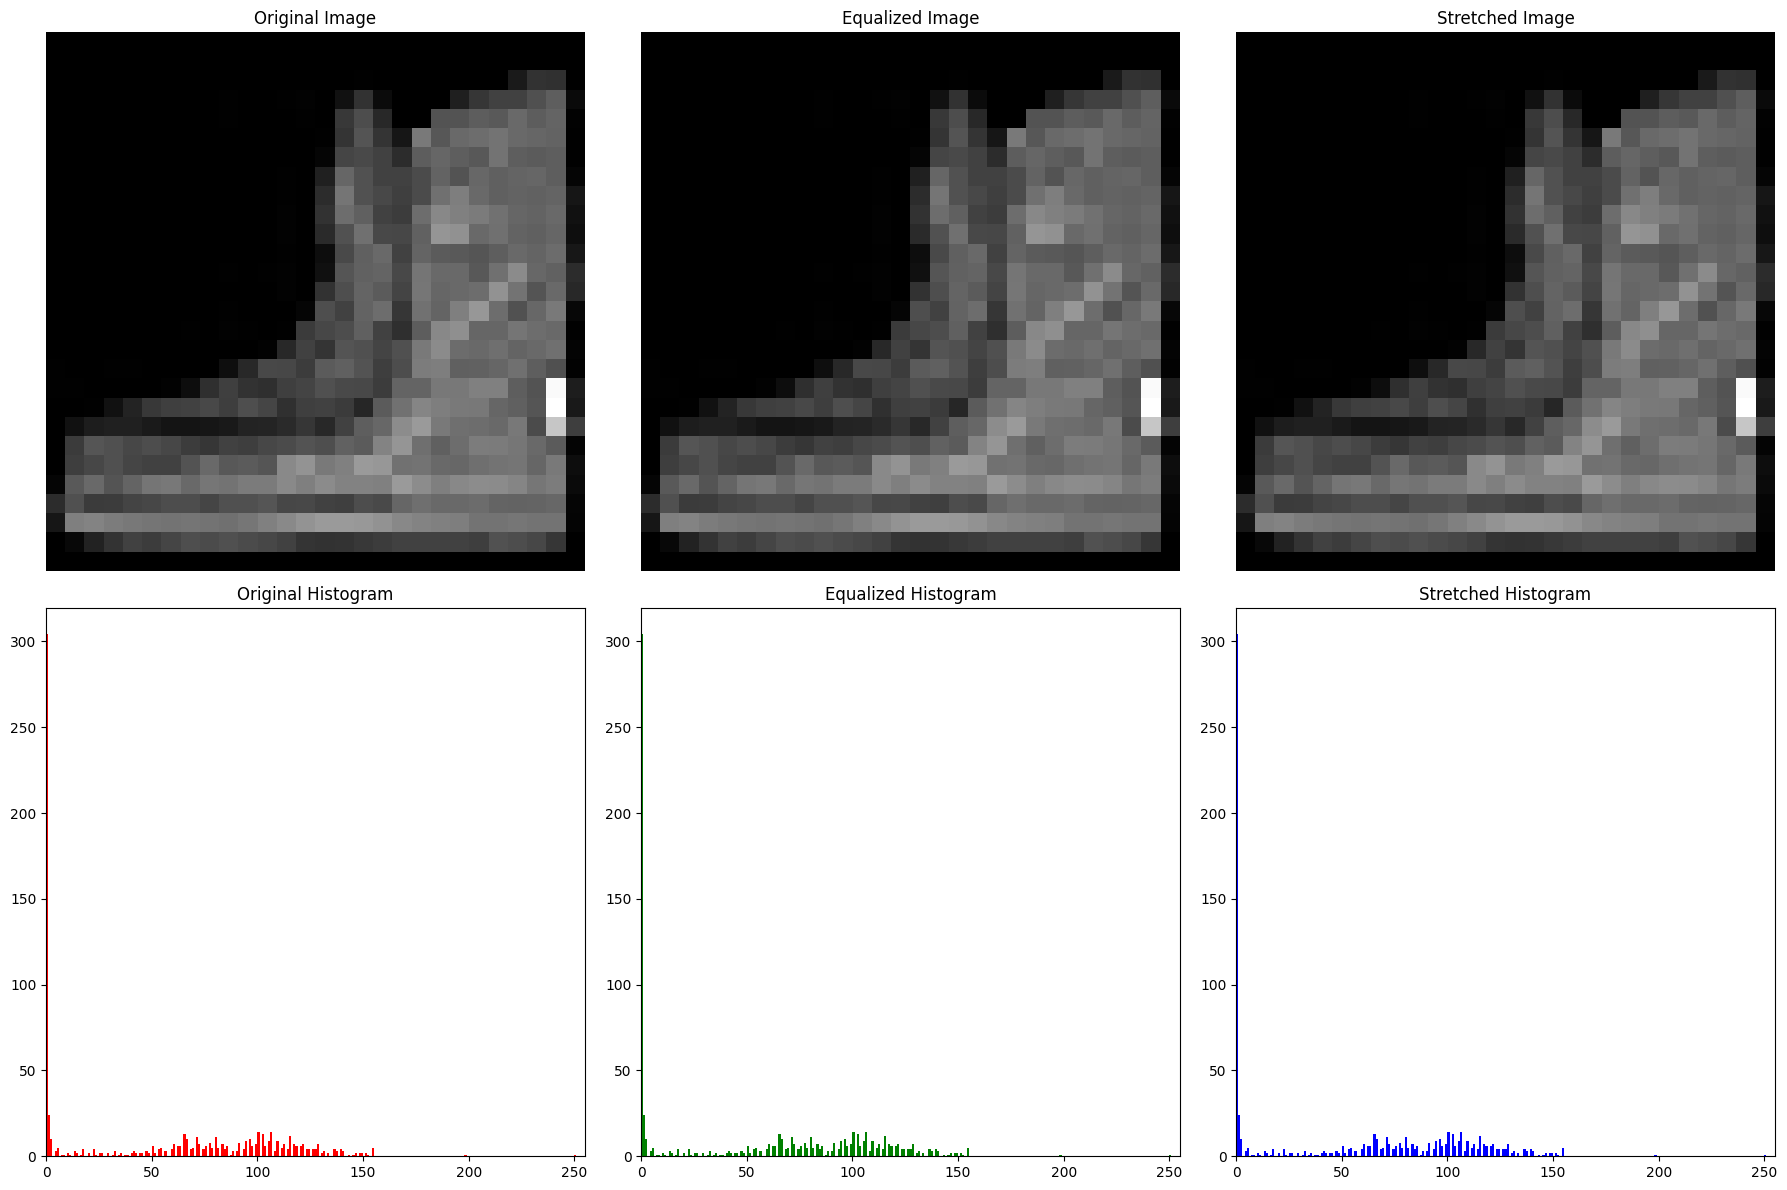

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_equalized, cmap='gray')
axs[0, 1].set_title('Equalized Image')
axs[0, 1].axis('off')

axs[0, 2].imshow(img_str, cmap='gray')
axs[0, 2].set_title('Stretched Image')
axs[0, 2].axis('off')

axs[1, 0].hist(image.flatten(), bins=256, range=[0, 256], color='red')
axs[1, 0].set_title('Original Histogram')
axs[1, 0].set_xlim([0, 255])

axs[1, 1].hist(img_equalized.flatten(), bins=256, range=[0, 256], color='green')
axs[1, 1].set_title('Equalized Histogram')
axs[1, 1].set_xlim([0, 255])

axs[1, 2].hist(img_str.flatten(), bins=256, range=[0, 256], color='blue')
axs[1, 2].set_title('Stretched Histogram')
axs[1, 2].set_xlim([0, 255])

plt.tight_layout()
plt.show()

In [ ]:
def calculate_stats(image):
    return {
        'min': np.min(image),
        'max': np.max(image),
        'mean': np.mean(image),
        'std': np.std(image),
        'median': np.median(image),
    }

o = calculate_stats(image)
eq = calculate_stats(img_equalized)
stretch_stats = calculate_stats(img_str)

print("Original Image Statistics:")
for stat, value in o.items():
    print(f"{stat}: {value:.2f}")

print("\nEqualized Image Statistics:")
for stat, value in eq.items():
    print(f"{stat}: {value:.2f}")

print("\nStretched Image Statistics:")
for stat, value in stretch_stats.items():
    print(f"{stat}: {value:.2f}")

Original Image Statistics:
min: 0.00
max: 255.00
mean: 49.65
std: 51.09
median: 44.50

Equalized Image Statistics:
min: 0.00
max: 255.00
mean: 49.65
std: 51.09
median: 44.50

Stretched Image Statistics:
min: 0.00
max: 255.00
mean: 49.65
std: 51.09
median: 44.50


**Conclusion :** In our experiment with image stretching and equalization demonstrated that these techniques markedly improve image contrast and detail. By redistributing pixel values, they enhance visibility and highlight features, which is vital in applications like medical imaging for accurate diagnoses and satellite photography for clearer observations. Enhanced image quality facilitates better analysis and decision-making across various fields.